<a href="https://colab.research.google.com/github/xoghub/dicoding-MLT-Prediction-Analysis/blob/main/cars_price_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
# from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [59]:
# link dataset
from google.colab import drive
# https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data
# https://raw.githubusercontent.com/xoghub/dicoding-MLT-Prediction-Analysis/main/CarPrice_Assignment.csv
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [60]:
url_dataset = 'https://raw.githubusercontent.com/xoghub/dicoding-MLT-Prediction-Analysis/main/CarPrice_Assignment.csv'
car = pd.read_csv(url_dataset)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Explanation about feature of dataset

In [61]:
car.drop(['car_ID', 'symboling', 'CarName'], inplace=True, axis=1)

In [62]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [63]:
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [64]:
car.shape

(205, 23)

Visualisasi Data dengan Boxplot untuk mengetahui apa ada tidaknya data yang diluar IQR.

<Axes: xlabel='carheight'>

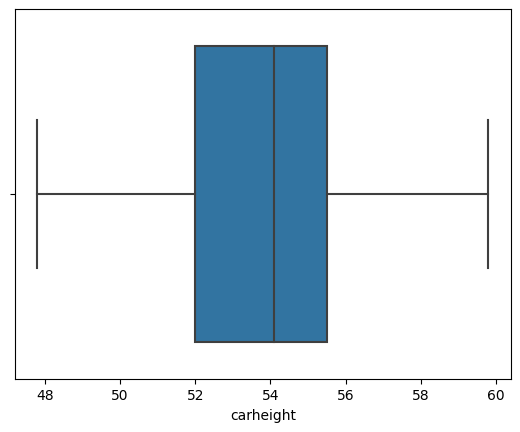

In [65]:
sns.boxplot(x=car['carheight'])

<Axes: xlabel='carlength'>

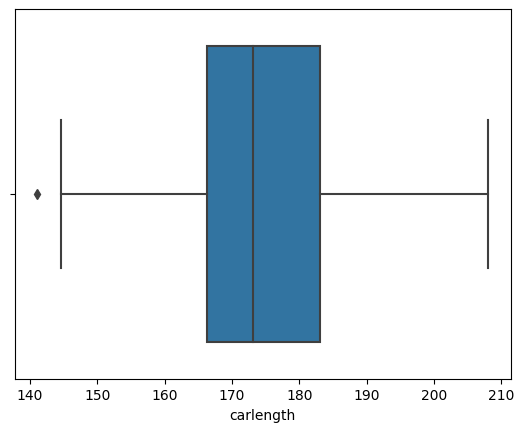

In [66]:
sns.boxplot(x=car['carlength'])

<Axes: xlabel='carwidth'>

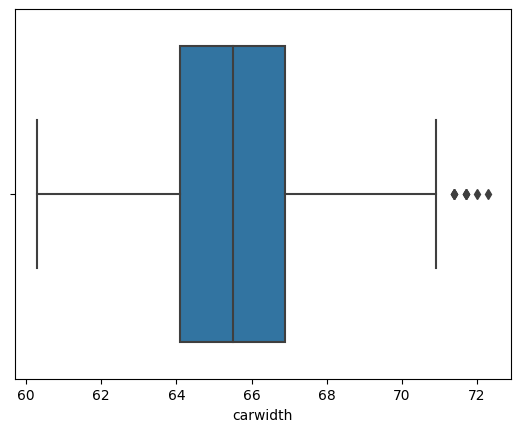

In [67]:
sns.boxplot(x=car['carwidth'])

<Axes: xlabel='wheelbase'>

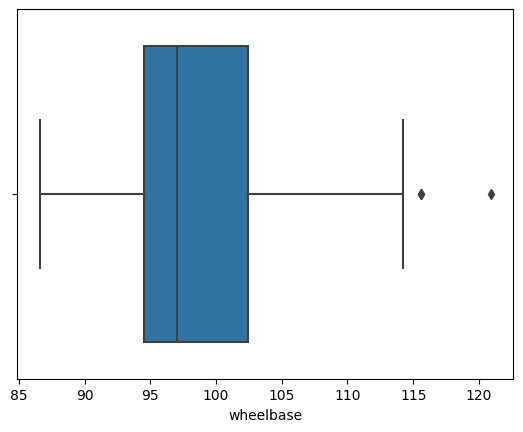

In [68]:
sns.boxplot(x=car['wheelbase'])

<Axes: xlabel='horsepower'>

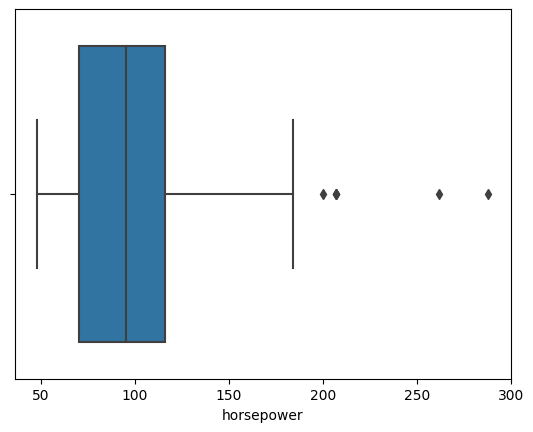

In [69]:
sns.boxplot(x=car['horsepower'])

Kesimpulan ada beberapa data yang diluar IQR. Oleh karenanya, saya akan melakukan drop pada data yang diluar IQR.

In [70]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3-Q1

car = car[~((car<(Q1-1.5*IQR))|(car>(Q3+1.5*IQR))).any(axis=1)]
car.shape

<ipython-input-70-7c10e72b0f8e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = car.quantile(0.25)
<ipython-input-70-7c10e72b0f8e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = car.quantile(0.75)
<ipython-input-70-7c10e72b0f8e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  car = car[~((car<(Q1-1.5*IQR))|(car>(Q3+1.5*IQR))).any(axis=1)]


(139, 23)

*Analysis* Setiap Feature pada data dengan visualisasi sederhana menggunakan barchart.

In [71]:
numerical_feature = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
categorical_feature = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

     jumlah sample  persentase
gas            139       100.0


<Axes: title={'center': 'fueltype'}>

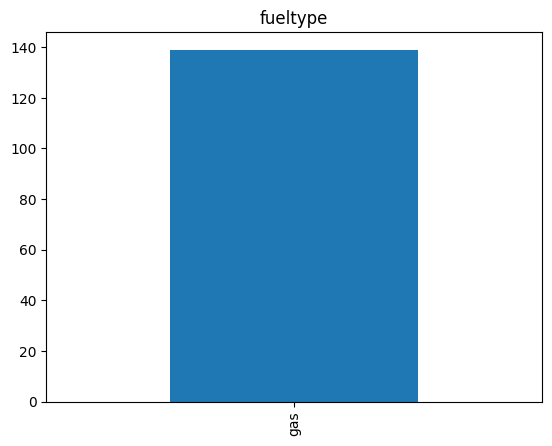

In [72]:
feature = categorical_feature[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, )

Kesimpulan dari diatas hanya terdapat mobil dengan bahan bakar *gas* atau bensin.

       jumlah sample  persentase
std              126        90.6
turbo             13         9.4


<Axes: title={'center': 'aspiration'}>

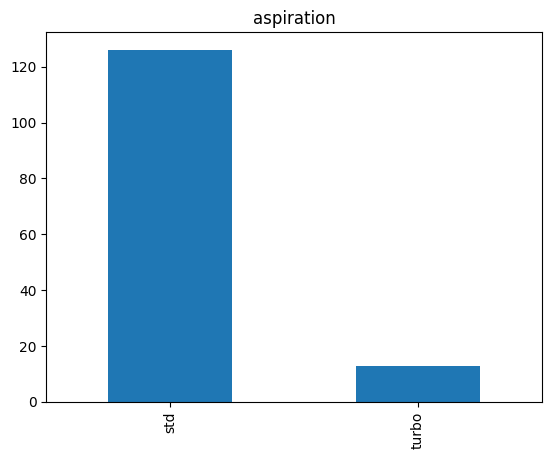

In [73]:
feature1 = categorical_feature[1]
count = car[feature1].value_counts()
percent = 100*car[feature1].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature1)

Kesimpulan dari chart diatas, bahwasannya pada data ini, mobil didominasi oleh jenis *aspiration* dengan jenis std atau standar sebanyak 90.4% dibandingkan turbo yang hanya 9.6%

      jumlah sample  persentase
four             76        54.7
two              63        45.3


<Axes: title={'center': 'doornumber'}>

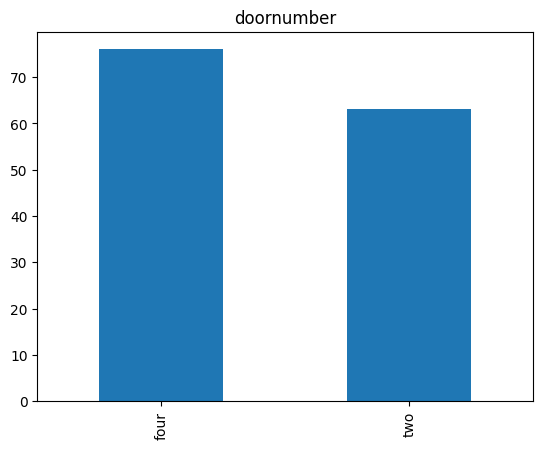

In [74]:
feature2 = categorical_feature[2]
count = car[feature2].value_counts()
percent = 100*car[feature2].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature2)

Kesimpulan mobil pada data ini didominasi oleh 4 pintu sebanyak 54.7% dibandingkan 2 pintu sebanyak 45.3%

             jumlah sample  persentase
sedan                   63        45.3
hatchback               53        38.1
wagon                   15        10.8
convertible              4         2.9
hardtop                  4         2.9


<Axes: title={'center': 'carbody'}>

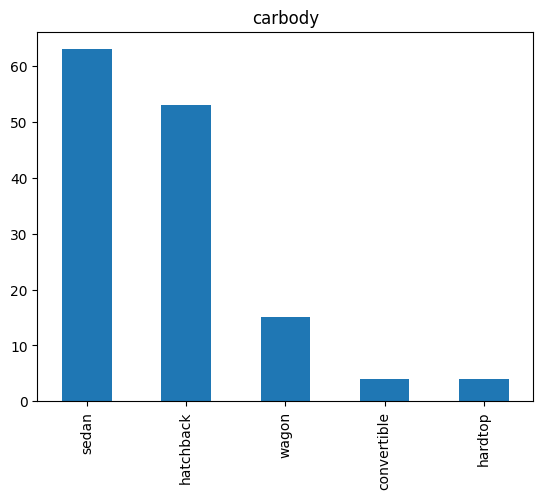

In [75]:
feature3 = categorical_feature[3]
count = car[feature3].value_counts()
percent = 100*car[feature3].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature3)

Untuk feature carbody atau body mobil di dominasi oleh sedan(45%) dan hatchback (38%).

     jumlah sample  persentase
fwd             92        66.2
rwd             44        31.7
4wd              3         2.2


<Axes: title={'center': 'drivewheel'}>

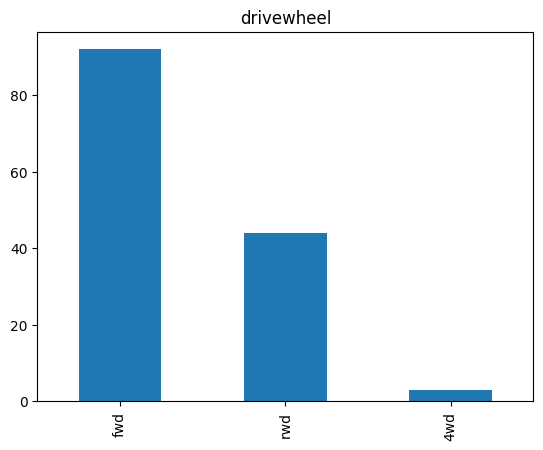

In [76]:
feature4 = categorical_feature[4]
count = car[feature4].value_counts()
percent = 100*car[feature4].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature4)

       jumlah sample  persentase
front            139       100.0


<Axes: title={'center': 'enginelocation'}>

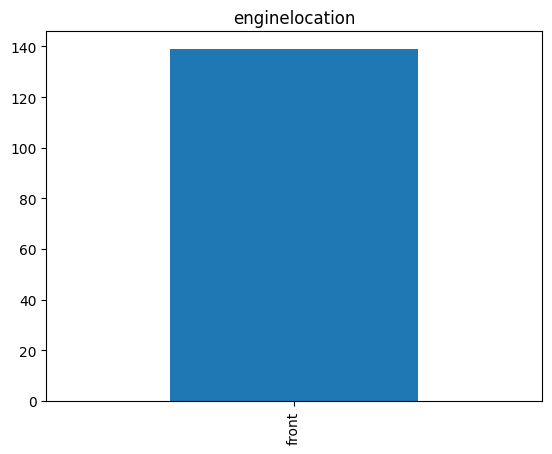

In [77]:
feature5 = categorical_feature[5]
count = car[feature5].value_counts()
percent = 100*car[feature5].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature5)

       jumlah sample  persentase
ohc              117        84.2
dohc               8         5.8
ohcv               7         5.0
rotor              4         2.9
l                  3         2.2


<Axes: title={'center': 'enginetype'}>

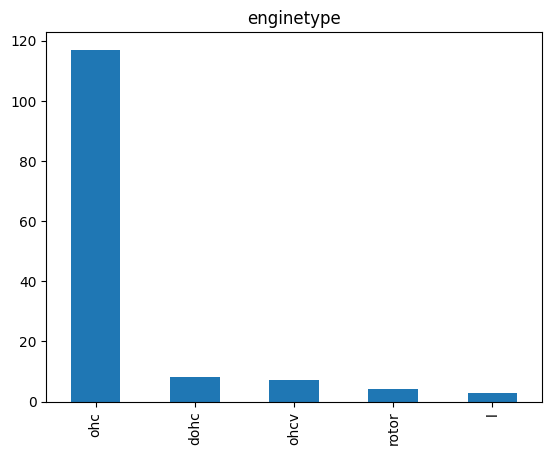

In [78]:
feature6 = categorical_feature[6]
count = car[feature6].value_counts()
percent = 100*car[feature6].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature6)

      jumlah sample  persentase
four            118        84.9
six              14        10.1
two               4         2.9
five              3         2.2


<Axes: title={'center': 'cylindernumber'}>

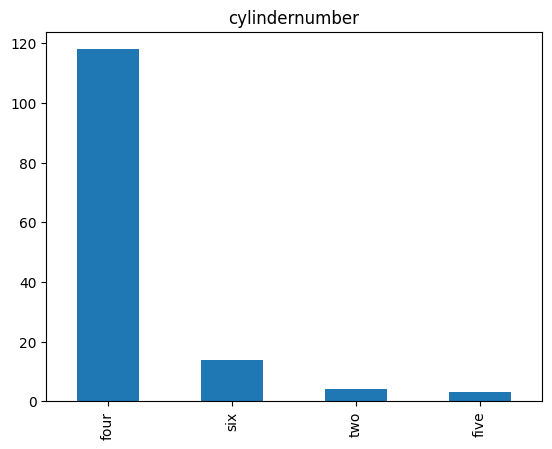

In [79]:
feature7 = categorical_feature[7]
count = car[feature7].value_counts()
percent = 100*car[feature7].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature7)

      jumlah sample  persentase
mpfi             63        45.3
2bbl             57        41.0
1bbl             10         7.2
spdi              5         3.6
4bbl              3         2.2
spfi              1         0.7


<Axes: title={'center': 'fuelsystem'}>

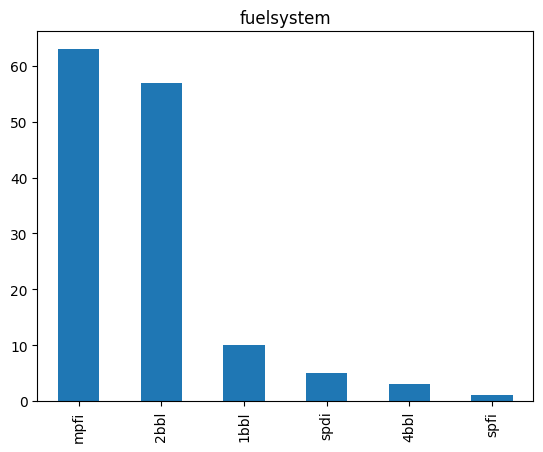

In [80]:
feature8 = categorical_feature[8]
count = car[feature8].value_counts()
percent = 100*car[feature8].value_counts(normalize=True)
df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
print(df)
count.plot(kind='bar', title=feature8)

In [81]:
# feature9 = categorical_feature[9]
# count = car[feature9].value_counts()
# percent = 100*car[feature9].value_counts(normalize=True)
# df = pd.DataFrame({"jumlah sample": count, "persentase": percent.round(1)})
# print(df)
# count.plot(kind='bar', title=feature9)

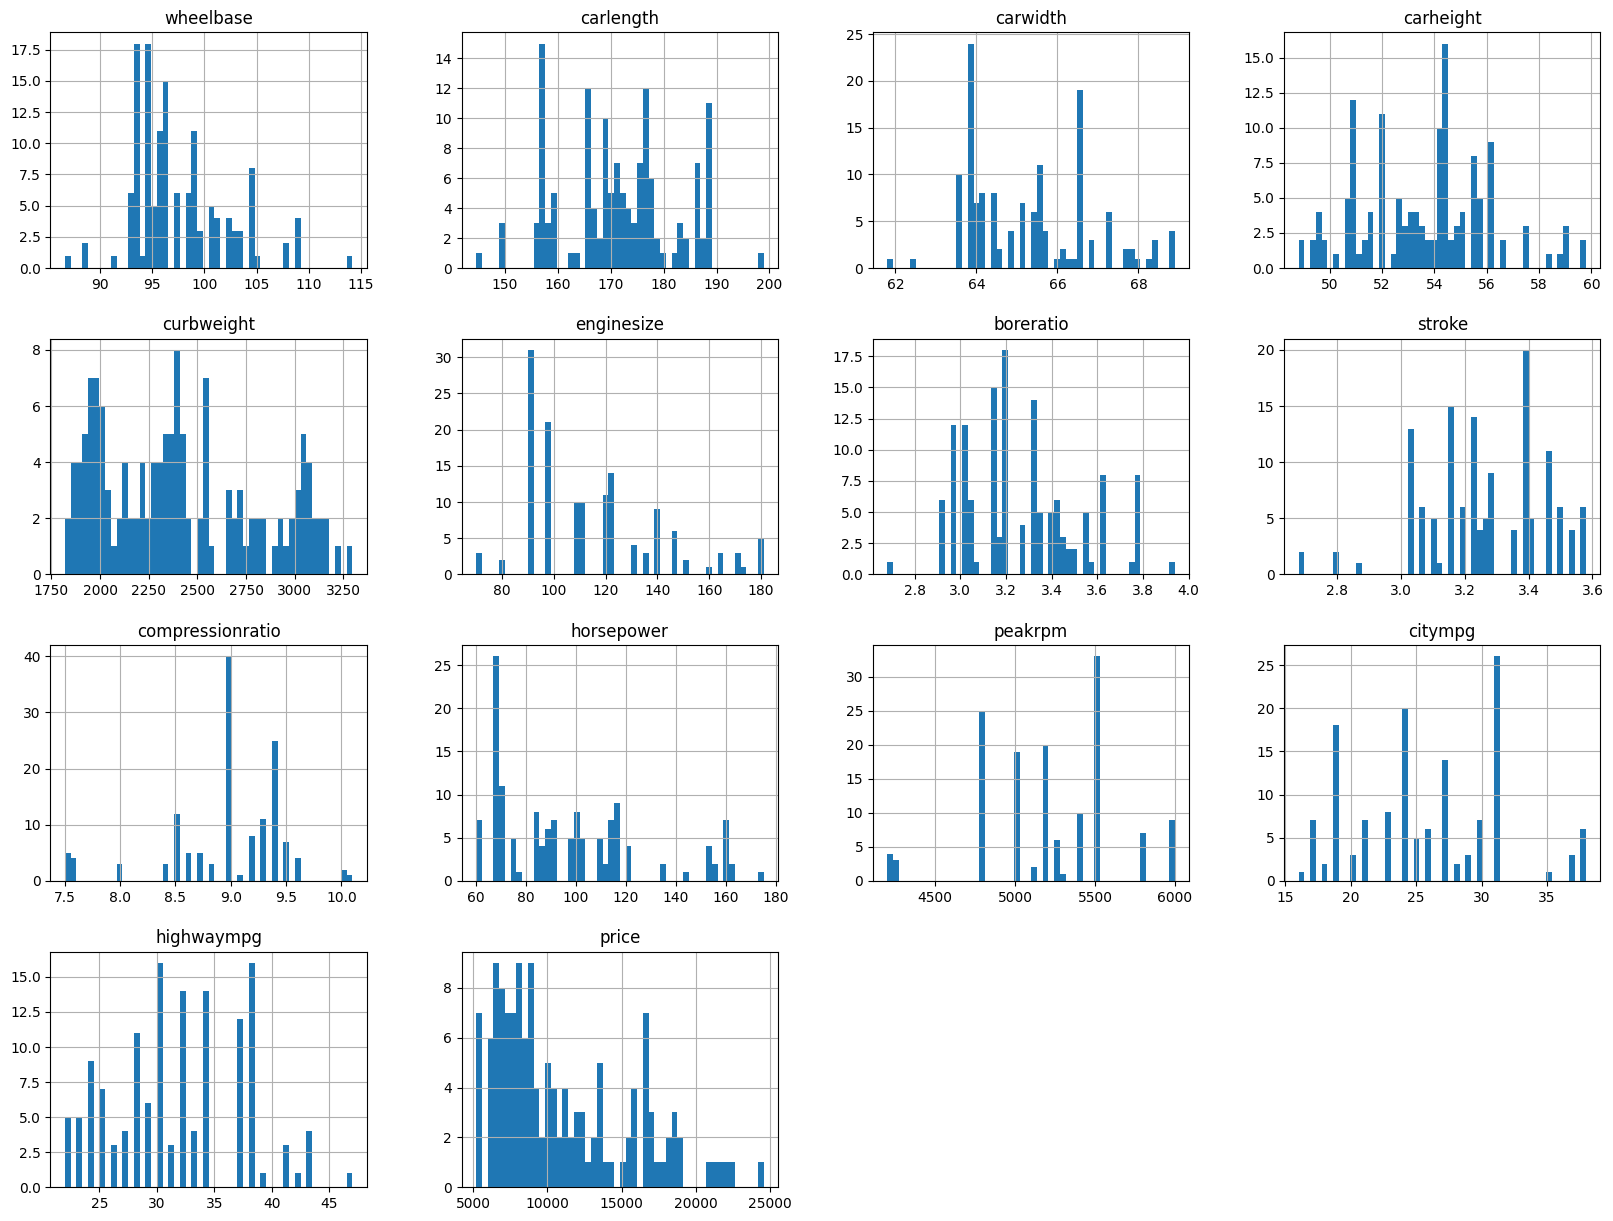

In [82]:
car.hist(bins=50, figsize=(20,15))
plt.show()

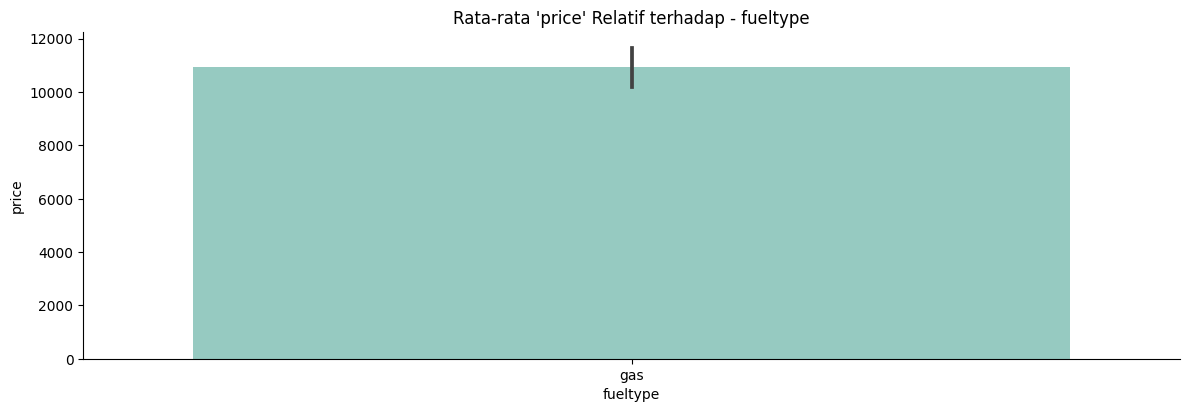

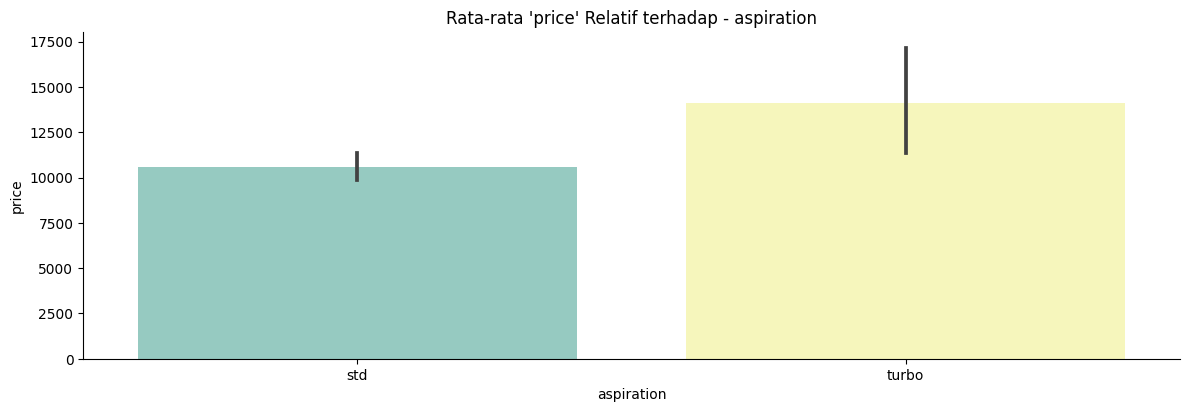

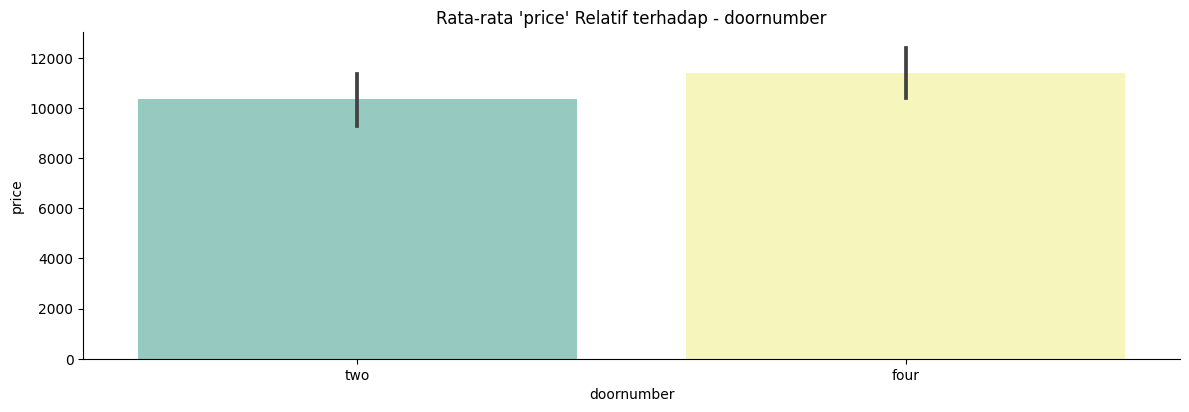

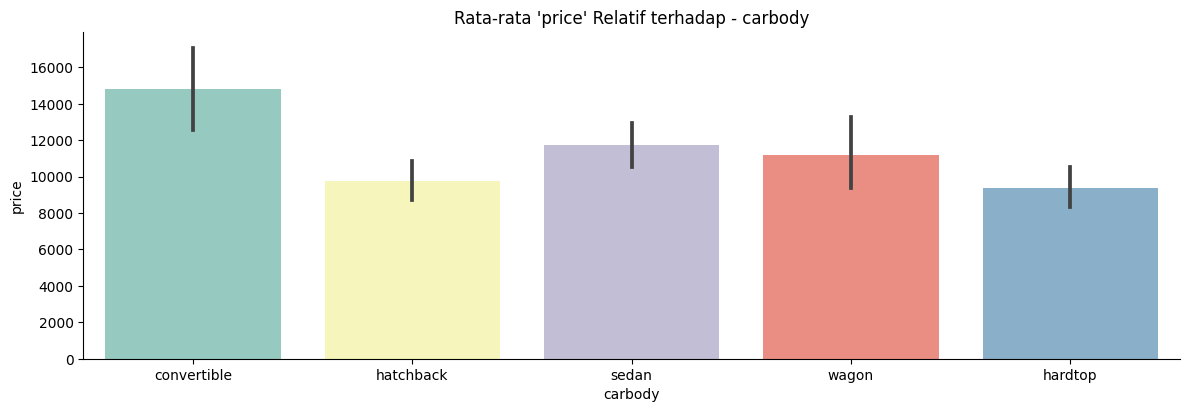

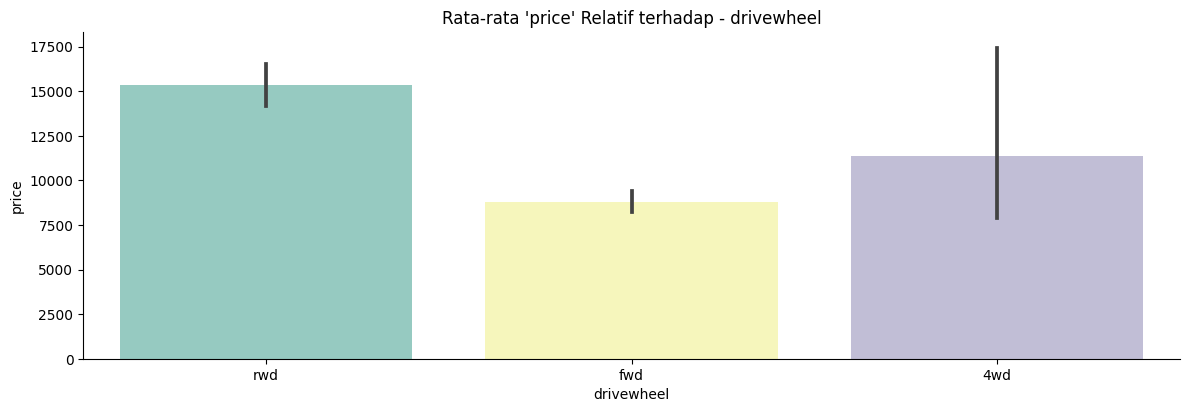

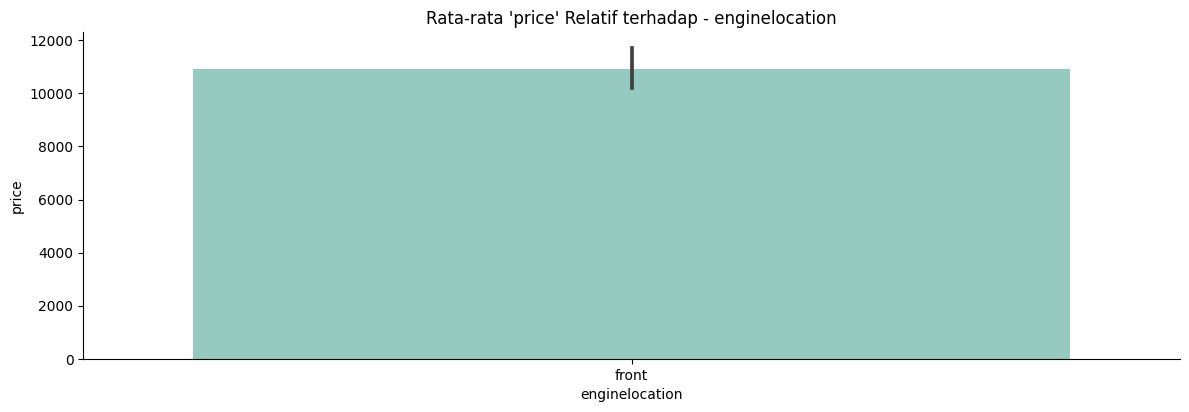

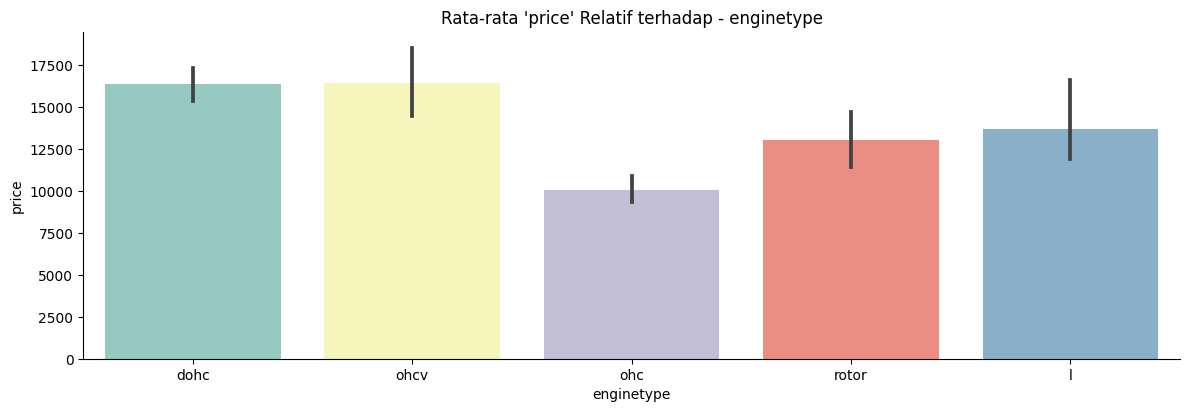

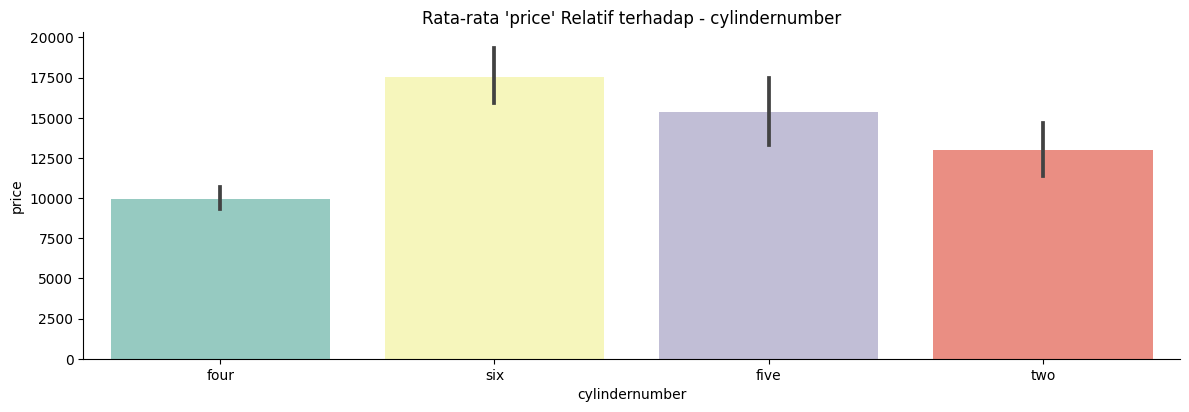

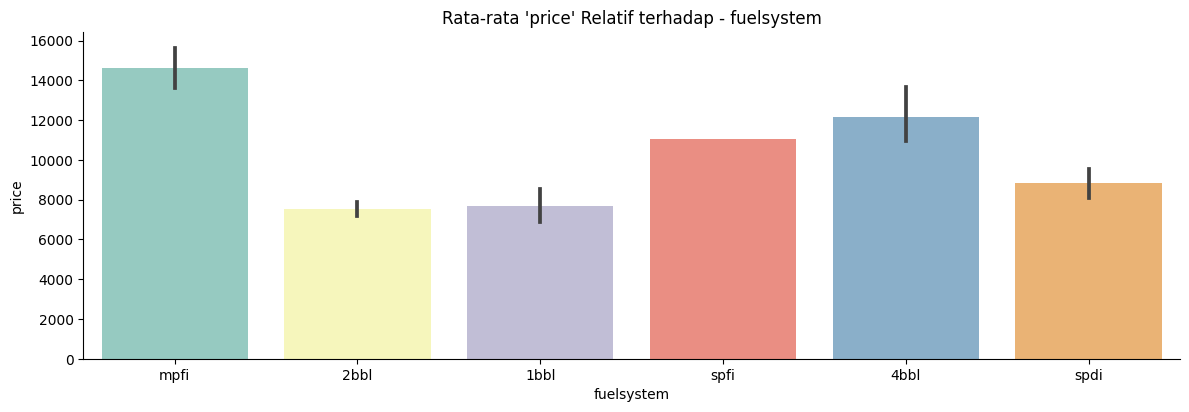

In [83]:
cat_features = car.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
  plt.savefig("/content/drive/MyDrive/Data CVS/Rata-rata 'price' Relatif terhadap - {}.png".format(col))

Melakukan preprosessing feature one hot encoding untuk setiap categorical feature untuk mempermudah proses training.

In [86]:
car = pd.concat([car, pd.get_dummies(car['fueltype'], prefix='fueltype')],axis=1)
car = pd.concat([car, pd.get_dummies(car['aspiration'], prefix='aspiration')],axis=1)
car = pd.concat([car, pd.get_dummies(car['doornumber'], prefix='doornumber')],axis=1)
car = pd.concat([car, pd.get_dummies(car['carbody'], prefix='carbody')],axis=1)
car = pd.concat([car, pd.get_dummies(car['drivewheel'], prefix='drivewheel')],axis=1)
car = pd.concat([car, pd.get_dummies(car['enginelocation'], prefix='enginelocation')],axis=1)
car = pd.concat([car, pd.get_dummies(car['enginetype'], prefix='enginetype')],axis=1)
car = pd.concat([car, pd.get_dummies(car['cylindernumber'], prefix='cylindernumber')],axis=1)
car = pd.concat([car, pd.get_dummies(car['fuelsystem'], prefix='fuelsystem')],axis=1)
car.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1, inplace=True)
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,0,0,0,0,1,0,0


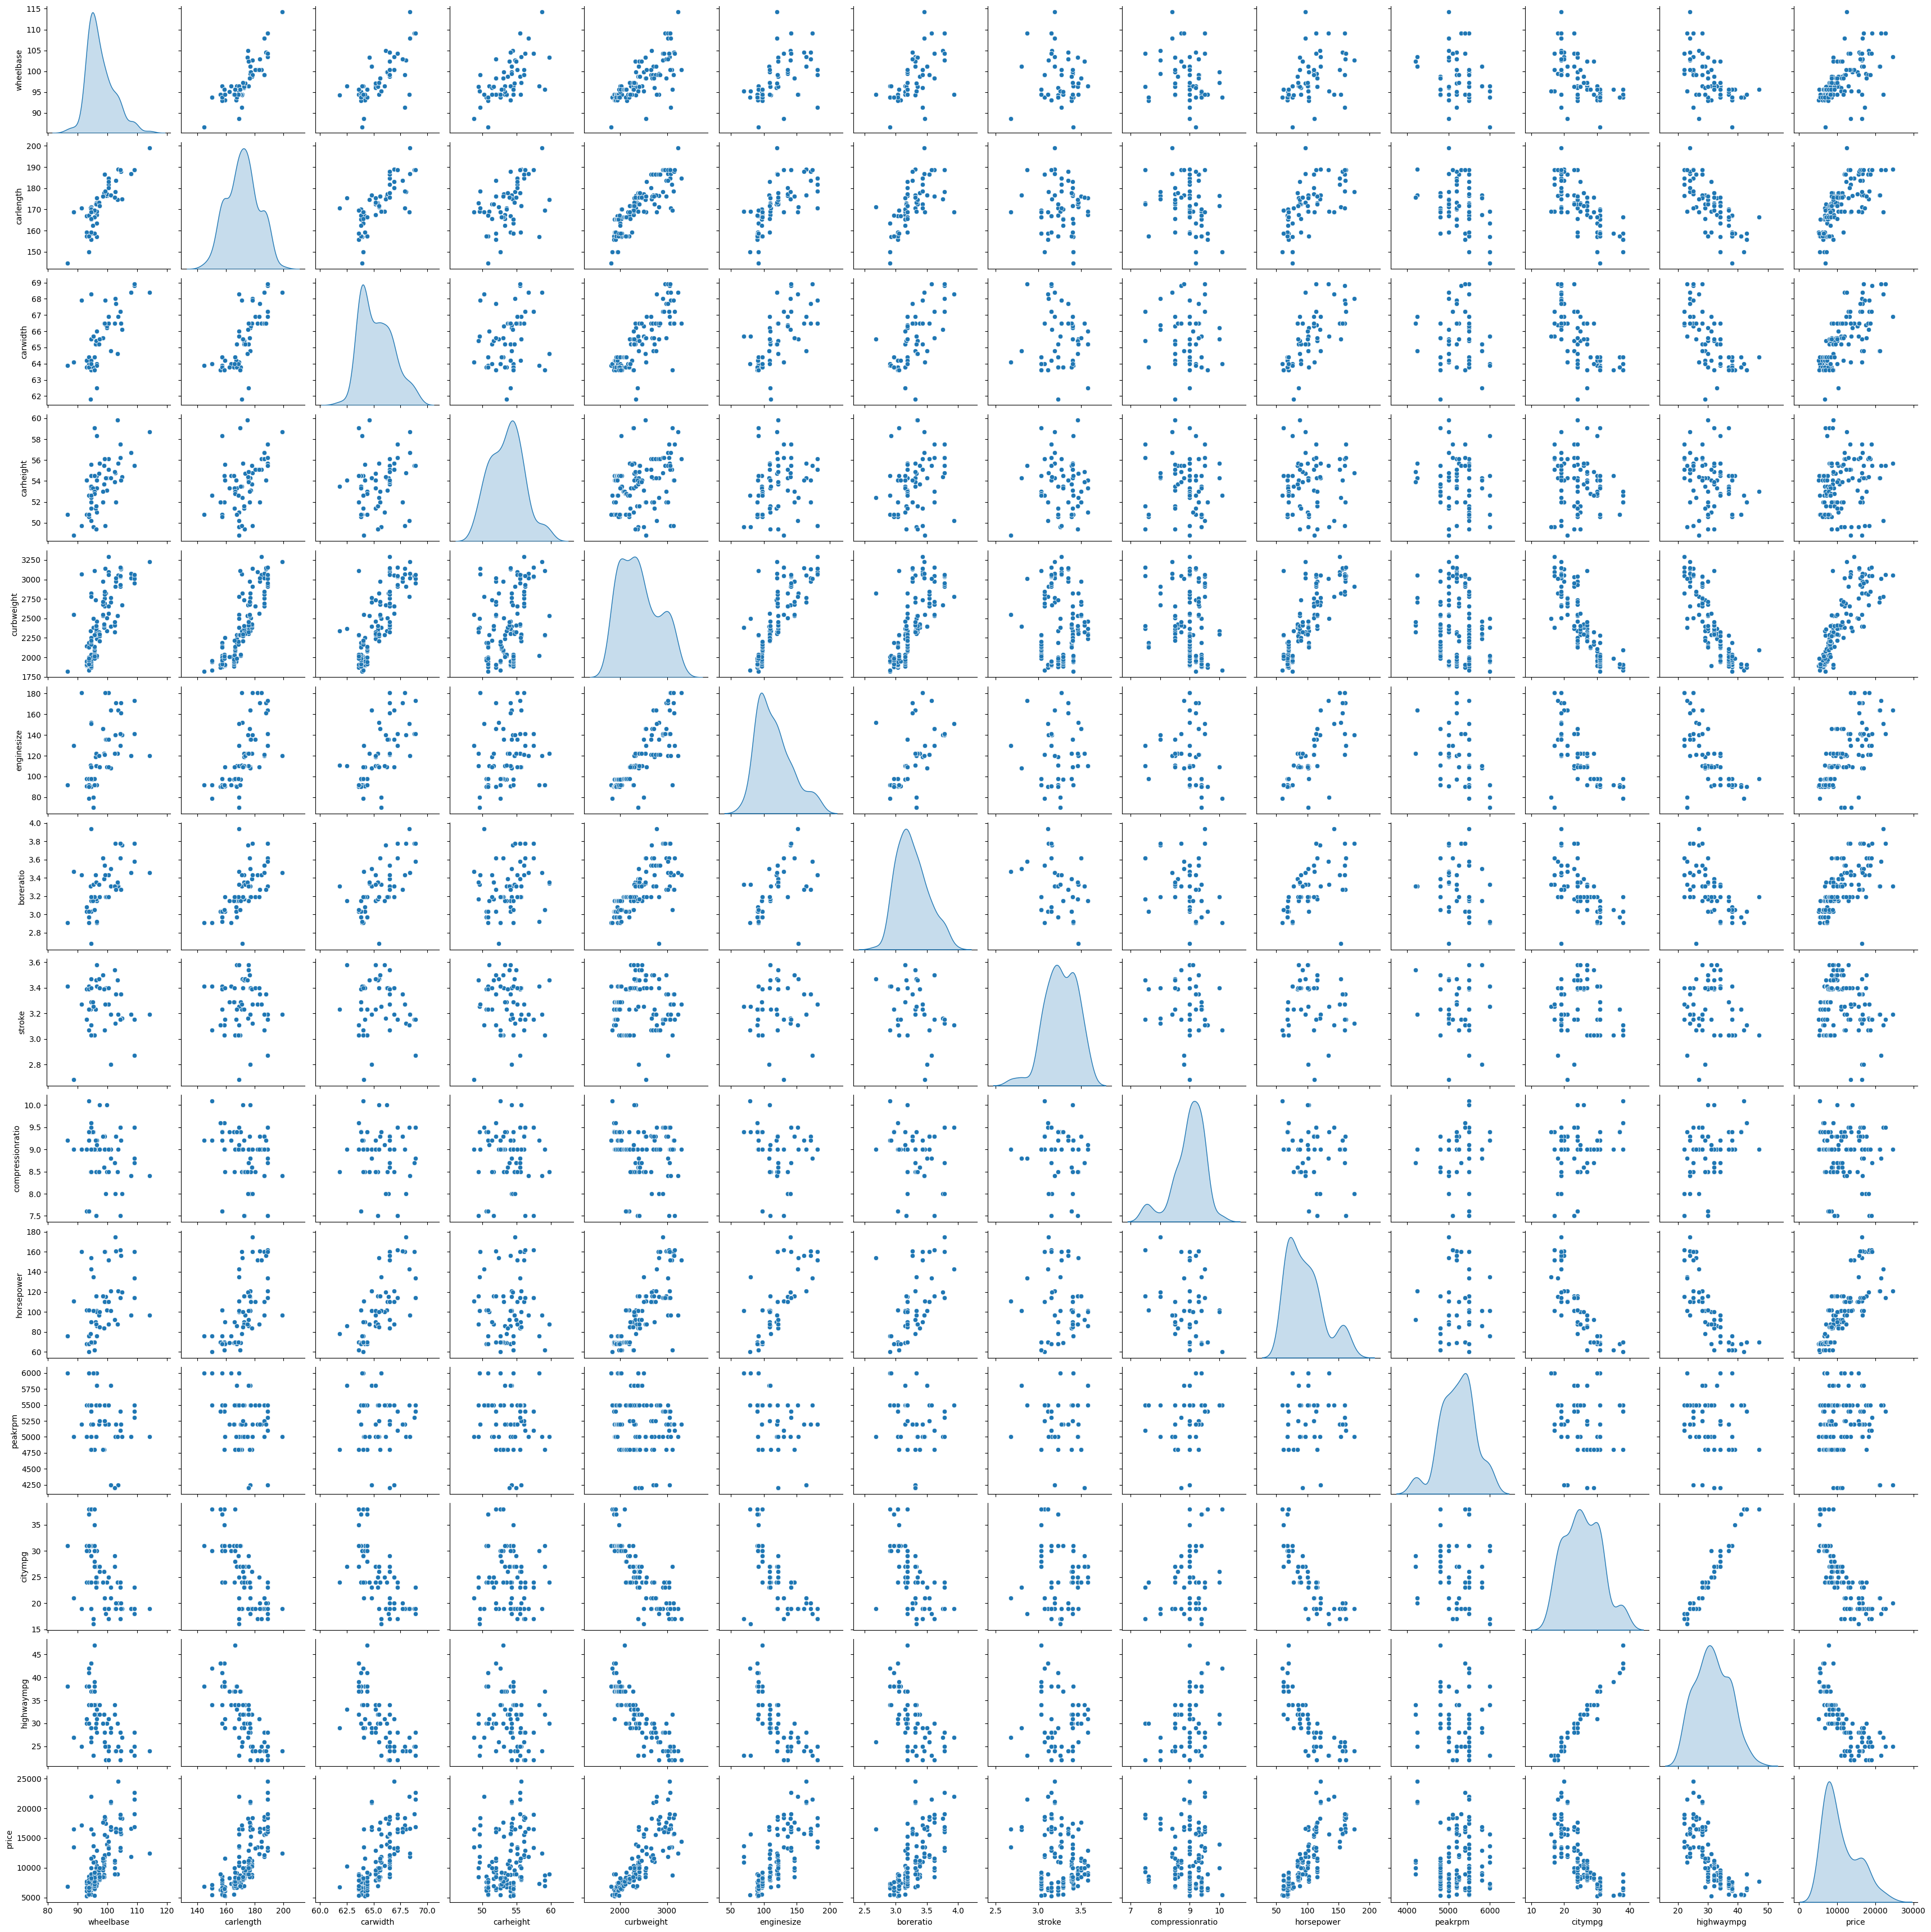

In [84]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(car, diag_kind = 'kde')

<ipython-input-85-d4ce65364b0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car.corr().round(2)


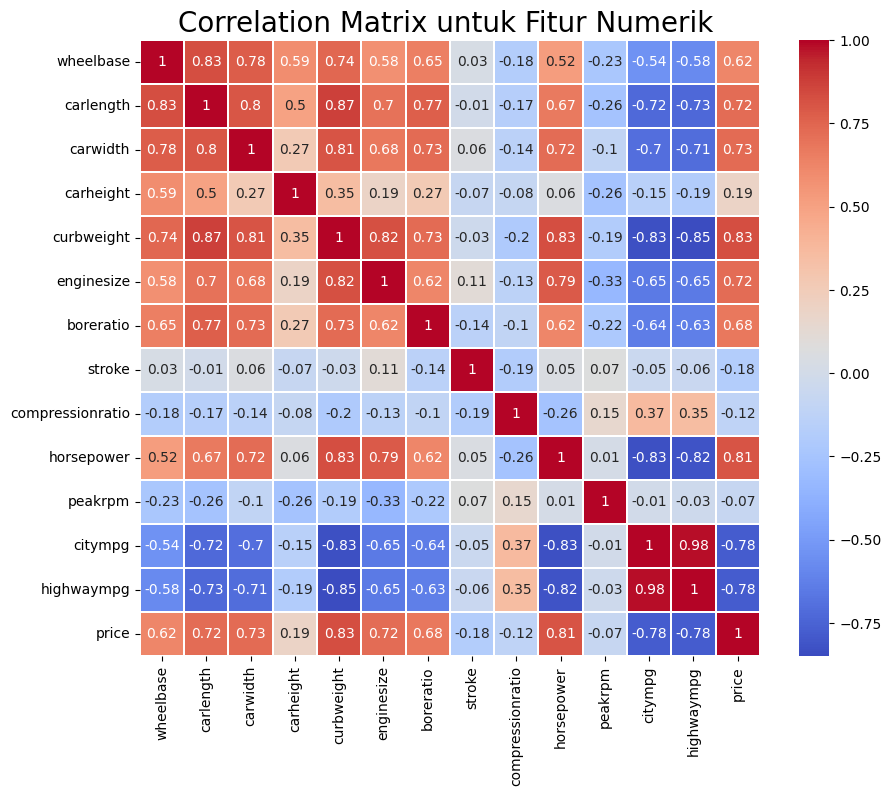

In [85]:
plt.figure(figsize=(10,8))
correlation_matrix = car.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.savefig("/content/drive/MyDrive/Data CVS/Rata-rata 'price' Relatif terhadap - {}.png".format(col))

Berdasarkan plot diatas menunjukan bahwa tidak ada feature yang harus dilakukan dropping atau penghapusan feature dikarenakan semua feature memiliki correlation yang lebih dari 0.05 dengan feature price. Akan tetapi ada beberapa feature yang memiliki korelasi yang kuat antar satu sama lain, yaitu carlength, carwidth, dan cubweight yang memiliki korelasi 0.8. oleh karenanya kita akan melakukan dimensi reduksi pada feature tersebut. selain ke tiga feature tersebut terdapat citympg dengan highwaympg yang memiliki korelasi sebesar 0.98 dan kita akan melakukan hal yang sama untuk feature sebelumnya.

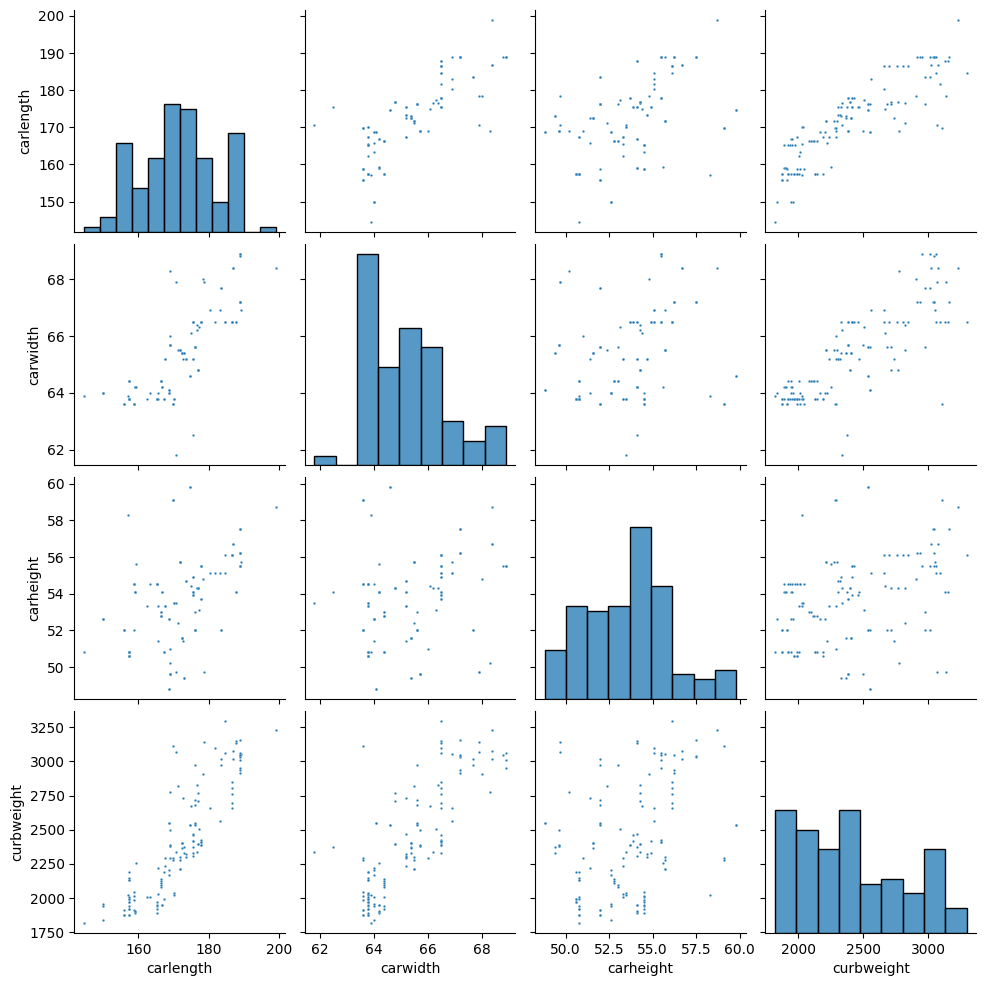

In [87]:
sns.pairplot(car[['carlength', 'carwidth', 'carheight', 'curbweight']], plot_kws={"s": 3});

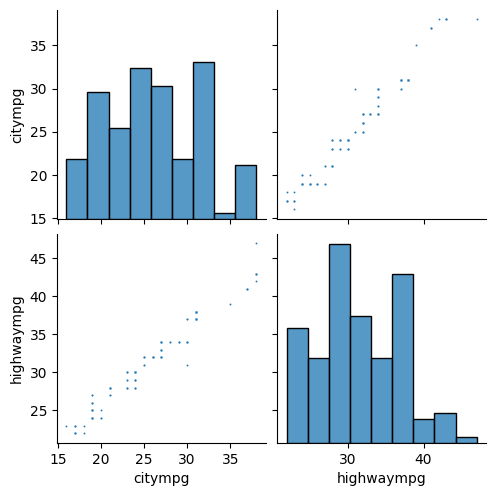

In [88]:
sns.pairplot(car[['citympg', 'highwaympg']], plot_kws={"s": 2});

Melakukan dimensi reduksi sebanyak 2 kali untuk dua kelompok feature:

1. ['carlength', 'carwidth', 'carheight', 'curbweight'] yang berhubungan dengan dimensi body mobil.
2. ['citympg', 'highwaympg'] yang berhubungan dengan kemampuan mobil untuk menempuh jarak per galon bahan bakar.

In [89]:
pca = PCA(n_components=4, random_state=123)
pca.fit(car[['carlength', 'carwidth', 'carheight', 'curbweight']])
princ_comp = pca.transform(car[['carlength', 'carwidth', 'carheight', 'curbweight']])
pca.explained_variance_ratio_.round(3)

array([1., 0., 0., 0.])

In [90]:
pca = PCA(n_components=1, random_state=123)
pca.fit(car[['carlength', 'carwidth', 'carheight', 'curbweight']])
princ_comp = pca.transform(car[['carlength', 'carwidth', 'carheight', 'curbweight']])
pca.explained_variance_ratio_.round(3)

array([1.])

In [91]:
car['overall_size'] =princ_comp
car.drop(['carlength', 'carwidth', 'carheight', 'curbweight'], axis=1, inplace=True)

In [92]:
pca = PCA(n_components=2, random_state=123)
pca.fit(car[['citympg', 'highwaympg']])
princ_comp = pca.transform(car[['citympg', 'highwaympg']])
pca.explained_variance_ratio_.round(3)

array([0.99, 0.01])

In [93]:
pca = PCA(n_components=1, random_state=123)
pca.fit(car[['citympg', 'highwaympg']])
princ_comp = pca.transform(car[['citympg', 'highwaympg']])
pca.explained_variance_ratio_.round(3)

array([0.99])

In [94]:
car['mpg'] =princ_comp
car.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [95]:
car

,wheelbase,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueltype_gas,aspiration_std,...,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,overall_size,mpg
0,88.6,130,3.47,2.68,9.0,111,5000,13495.0,1,1,...,0,0,0,0,0,1,0,0,139.123861,-6.571617
1,88.6,130,3.47,2.68,9.0,111,5000,16500.0,1,1,...,0,0,0,0,0,1,0,0,139.123861,-6.571617
2,94.5,152,2.68,3.47,9.0,154,5000,16500.0,1,1,...,1,0,0,0,0,1,0,0,414.116243,-8.688067
3,99.8,109,3.19,3.40,10.0,102,5500,13950.0,1,1,...,0,0,0,0,0,1,0,0,-71.621156,-2.329074
4,99.4,136,3.19,3.40,8.0,115,5500,17450.0,1,1,...,0,0,0,0,0,1,0,0,415.247051,-12.237980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,104.3,130,3.62,3.15,7.5,162,5100,18950.0,1,0,...,0,0,0,0,0,1,0,0,748.446612,-12.940250
200,109.1,141,3.78,3.15,9.5,114,5400,16845.0,1,1,...,0,0,0,0,0,1,0,0,543.503224,-4.455166
201,109.1,141,3.78,3.15,8.7,160,5300,19045.0,1,0,...,0,0,0,0,0,1,0,0,640.476551,-9.399978
202,109.1,173,3.58,2.87,8.8,134,5500,21485.0,1,1,...,1,0,0,0,0,1,0,0,603.486912,-11.526069


Melakukan Splitting dataset menjadi 2 yaitu train dan test dataset dengan price sebagai target/variabel independent atau y serta feature lainnya sebagai variabel independent atau x .

In [96]:
X = car.drop(["price"],axis =1)
y = car["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Melakukan pemeriksaan pada numerical feature dan melakukan normalisasi standar scaler serta melakukan pembulatan ke atas dengan mempertahankan 4 angka dibelakang koma.

In [97]:
numerical_features = ['wheelbase', 'overall_size', 'boreratio', 'horsepower', 'mpg']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,wheelbase,overall_size,boreratio,horsepower,mpg
178,1.150218,1.360762,-0.002819,2.137531,-1.261508
39,-0.267400,-0.261739,-0.472103,-0.364219,0.230978
162,-0.444602,-0.658114,-0.315675,-0.897925,0.417379
133,0.308508,0.682682,1.053071,0.436341,-0.793597
189,-0.710405,-0.383322,-0.315675,-0.230792,-0.422064


In [98]:
X_train[numerical_features].describe().round(4)

,wheelbase,overall_size,boreratio,horsepower,mpg
count,111.0000,111.0000,111.0000,111.0000,111.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0045,1.0045,1.0045,1.0045,1.0045
min,-2.4603,-1.4341,-2.3101,-1.2315,-1.7269
25%,-0.7104,-0.9382,-0.8632,-0.9313,-0.7936
50%,-0.2674,-0.1820,-0.3157,-0.2308,0.0446
75%,0.5965,0.8054,0.6229,0.5698,0.9766
max,3.6532,2.1332,2.6174,2.6045,2.1876


Melakukan proses training ketiga model machine learning, yaitu linear regression, random forest regression, dan Ada Boosting algorithma untuk dapat memprediksi harga mobil yang sesuai dengan feature yang sudah dilakukan preprosessing terlebih dahulu.

In [99]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['Linear Regression', 'RandomForest', 'Boosting'])

In [100]:
linear = LinearRegression()
linear.fit(X_train, y=y_train)

models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = linear.predict(X_train), y_true=y_train)

In [101]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=23, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [102]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [103]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [104]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['Linear Regression','RandomForest','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'Linear Regression': linear, 'RandomForest': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
Linear Regression,2322.141954,5461.526734
RandomForest,568.6093,1920.502856
Boosting,1420.812177,1806.428845


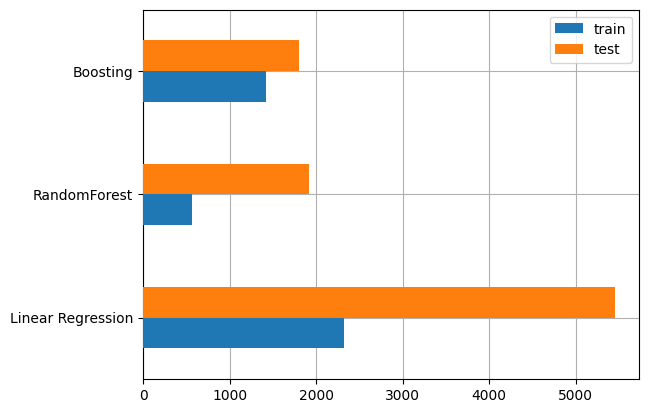

In [105]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.savefig("/content/drive/MyDrive/Data CVS/Evaluasi-Plot.png".format(fig))

Hasil Evaluasi menunjukan bahwa algoritma random forest regression memiliki loss yang yang rendah pada train dataset, akan tetapi pada test dataset masih lebih tinggi dibandingkan dengan algoritma boosting.

In [106]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Linear Regression,prediksi_RandomForest,prediksi_Boosting
160,7738.0,5434.5,7550.1,7473.3


Hasil akhir menunjukan bahwa prediksi Random Forest lebih baik dibandingkan prediksi Boosting atau linear regression.